In [60]:
import pickle
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable

In [61]:
def unpickle(filepath):
    with open(filepath, 'rb') as f:
        result = pickle.load(f, encoding='bytes')
    return result

In [62]:
filepath = 'cifar-10-batches-py/data_batch_{}'
temp1 = unpickle(filepath.format(1))
train_data = np.copy(temp1[b'data'])
train_label = np.copy(temp1[b'labels'])
for i in range(1,6):
    temp = unpickle(filepath.format(i))
    train_data = np.vstack((train_data,temp[b'data']))
    train_label = np.hstack((train_label, temp[b'labels']))

In [63]:
test = unpickle('cifar-10-batches-py/test_batch')
test_data = test[b'data']
test_label = test[b'labels']

In [64]:
epoch = 200
lr = 0.01

In [65]:
class Module(nn.Module):
    def __init__(self):
        super(Module, self).__init__()
        self.l1 = nn.Linear(3072,200)
        self.l2 = nn.Linear(200,100)
        self.sigmoid = nn.Sigmoid()
        self.l3 = nn.Linear(100,10)
    def forward(self, x):
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = self.sigmoid(x)
        x = self.l3(x)
        return x

In [66]:
model = Module()
optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9)  
criterion = nn.CrossEntropyLoss()

In [67]:
log = []
features = Variable(torch.from_numpy(train_data).type(torch.FloatTensor))
target = Variable(torch.from_numpy(train_label).type(torch.LongTensor))

In [68]:
for e in range(epoch):
    y_hat = model(features)
    loss = criterion(y_hat, target)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    _, y_pred = torch.max(y_hat, 1)
    y_pred = y_pred.data.numpy()       
    acc = accuracy_score(train_label, y_pred)
    p,r,f,_ = precision_recall_fscore_support(train_label, y_pred)
    log.append((e, loss.data[0], f[0],f[1]))
    if e % 10 == 9:
        print('Epoch %d: %f'%(e + 1, loss))
print('DONE')

/home/mishuhashi/miniconda2/envs/env3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mishuhashi/miniconda2/envs/env3.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  # This is added back by InteractiveShellApp.init_path()


Epoch 10: 2.251239
Epoch 20: 2.205211
Epoch 30: 2.163429
Epoch 40: 2.119987
Epoch 50: 2.080851
Epoch 60: 2.045194
Epoch 70: 2.012710
Epoch 80: 1.984631
Epoch 90: 1.958059
Epoch 100: 1.941157
Epoch 110: 1.917127
Epoch 120: 1.895405
Epoch 130: 1.873988
Epoch 140: 1.899629
Epoch 150: 1.863364
Epoch 160: 1.864782
Epoch 170: 1.811084
Epoch 180: 1.799587
Epoch 190: 1.782851
Epoch 200: 1.773024
DONE


In [69]:
model.eval()

Module(
  (l1): Linear(in_features=3072, out_features=200, bias=True)
  (l2): Linear(in_features=200, out_features=100, bias=True)
  (sigmoid): Sigmoid()
  (l3): Linear(in_features=100, out_features=10, bias=True)
)

In [70]:
output = model(torch.from_numpy(test_data).type(torch.FloatTensor))

In [71]:
value, index = output.max(1)

In [72]:
labels = index.data.numpy()

In [73]:
acc = accuracy_score(test_label,labels)

In [74]:
acc

0.3983

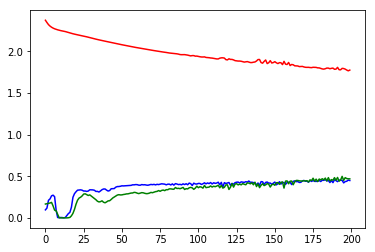

In [76]:
from matplotlib import pyplot as plt
epochs, losses, f0, f1 = zip(*log)
figure = plt.plot(epochs, losses, 'r-',epochs,f0,'b-',epochs,f1,'g-')
plt.show()